Esercizio A4:
 [[-0.5  0.5  0.5]
 [ 0.5 -0.5  0.5]
 [ 0.5  0.5 -0.5]]


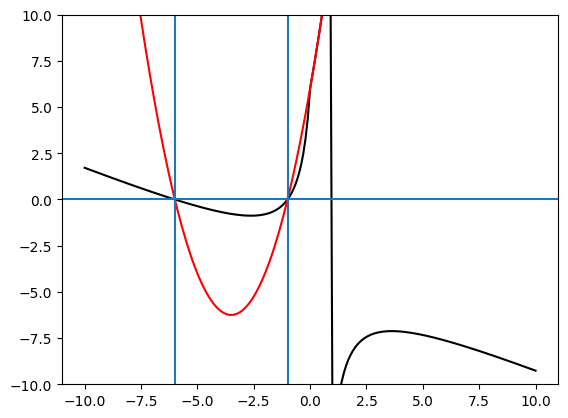

Esercizio A2:
 [[0.9]]
Esercizio B3:
 [[1. 0. 1.]
 [1. 2. 0.]
 [0. 1. 0.]]
Esercizio B2:
Dim kernel =  2
[-0.15524253 -0.38808391 -0.85376666  0.31044022]
[0.49510658 0.34441494 0.04303166 0.79648986]
Rango vettori colonna =  2


In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random
from numpy.linalg import solve, inv, matrix_rank
from scipy.linalg import lu as gauss
from scipy.linalg import null_space

# Compitino di Geometria A del 3/12/2022.

# Esercizio 4.
# Calcolare M tale che AM=I se A = (0,1,1; 1,0,1; 1,1,0)

aa = np.array([[0,1,1],[1,0,1],[1,1,0]])
i3 = np.array([[1,0,0],[0,1,0],[0,0,1]])
mm = solve(aa,i3)
print("Esercizio A4:\n", mm)


# Esercizio 2.

# Considerati i piani di equazioni cartesiane
# x+2y+kz=0, kx+y+10z=0, x+y-4z=0
# dire per quali valori del parametro reale k l'intersezione è una retta
# oppure un punto.

# Definiamo una funzione che restituisce la matrice dei coefficienti
# in funzione di k.
def mat(k):
    mm = np.array([[1,2,k],[k,1,10],[1,1,-4]])
    return mm

# Definiamo un intervallo di valori di k.
kk = np.linspace(-10,10,201)
# Calcoliamo il rango della matrice per ogni valore di k.
rr = []
for k in kk:
    pl, u = gauss(mat(k), permute_l=True)
    # t = np.matmul(l,u)
    rr.append(u[2,2])
rr = np.array(rr)

# Grafichiamo il risultato.
fig = plt.figure()
plt.plot(kk, rr, "-k")
plt.plot(kk, kk**2 + 7.0*kk + 6.0, "-r")
plt.axhline(0.0)
plt.axvline(-1.0)
plt.axvline(-6.0)
plt.ylim([-10.0,10.0])
plt.savefig("pivot.png", dpi=300)
plt.show()

# Per identificare gli zeri, troviamo i valori di k dove
# i segni di r[k+1] e r[k] sono diversi.
# Notare che con questo semplice metodo troviamo anche gli 
# asintoti, che poi vogliamo scartare.

ik0 = np.argwhere(  (rr[1:] * rr[:-1]) < 0)
k0 = kk[ik0]
print("Esercizio A2:\n", k0)



# Compitino di Geometria B del 3/12/2022.


# Esercizio 3.

# Vettori di base v.
v1 = np.array([1,1,1])
v2 = np.array([2,1,0])
v3 = np.array([-1,0,2])

# Immagine dei vettori di v.
f1 = np.array([3,2,1])
f2 = np.array([3,2,2])
f3 = np.array([1,1,1])

# Matrice dell'applicazione dalla base v alla base canonica.
mm_cv = np.c_[f1,f2,f3]

# Cambio di base dalla base v alla base canonica.
bb_cv = np.c_[v1,v2,v3]

# Cambio di base dalla base canonica alla base v.
bb_vc = inv(bb_cv)  # questa è la parte che richiede molti calcoli

# Matrice dell'applicazione dalla base v alla base v.
mm_vv = np.matmul(bb_vc, mm_cv)

print("Esercizio B3:\n", mm_vv)



# Esercizio 2.

# Sia M = (1,1-1,-1; 2,-3,1,0; 0,-5,3,2) e sia f l'applicazione lineare
# la cui matrice rispetto alle basi canoniche è M.  Determinare una base
# di ker(f).

mm = np.array([[1,1,-1,-1],[2,-3,1,0],[0,-5,3,2]])

# Verifichiamo la dimensione del kernel calcolando il rango.
rk = matrix_rank(mm)
ncol = mm.shape[1]
dim_ker = ncol - rk
print("Esercizio B2:")
print("Dim kernel = ", dim_ker)

# Calcolo il kernel.
ker = null_space(mm)
v1 = ker[:,0]
v2 = ker[:,1]
print(v1)
print(v2)

# Soluzione esatta.
s1 = np.array([1,0,-2,3])
s2 = np.array([0,1,3,-2])

# Per verificare se lo span è lo stesso, costruisco la matrice dei vettori
# colonna e calcolo il rango (deve rimanere 2).
rks = matrix_rank(np.c_[v1,v2,s1,s2])
print("Rango vettori colonna = ", rks)


RIASSUNTO:

è possibile risolvere problemi di algebra lineare tramite scrittura di un codice che sfrutta determinati moduli di numpy (linalg in particolare).

- la funzione "solve" fa il prodotto fra matrici;
- la funzione "inv" fa il cambio di base;
- i vettori si definiscono con degli array: np.array([])
- le matrici, di seguito, si definiscono con degli array di liste: np.array([ [] [] ...])
- il rango di una matrice si trova con la funzione matrix_rank


In [2]:
# This file contains a summary with some of the most common operations to manage
# data using the numpy and matplotlib packages.
# The full documentation is available at the projects' websites.
# These packages might change over time, so that new methods are introduced
# or older methods and practices are deprecated.


# The numpy package.

# https://numpy.org/

# numpy has been around since the mid Nineties and is the foundation of
# numerical computation with Python.


import numpy as np  # it is common to shorten numpy to np or N (old-timey)


# Mathematical constants and functions.

print(np.pi)  # pi

print(np.e)  # Euler's number

print(np.sqrt(25.0))  # square root

print(np.power(2.0, 1.5))  # power

print(np.exp(-1.0))  # exponential

print(np.abs(-1.0))  # absolute value

print(np.abs(1.0 + 1.0j))  # modulus

print(np.angle(1.0 + 1.0j) / np.pi)  # argument


# The array class.

# In Physics:
#
# Vector: a collection of three real physical quantities, that change
# (transform) in a certain way when the the physical system they represent
# is rotated in space.  Examples: (x,y,z), (vx,vy,vz), (Ex,Ey,Ez), ...
# Other transformation rules lead to the definition of collection of physical
# quantities called: spinors, tensors, etc.
#
# Array: a collection of numbers.  Represents the components of a vector
# (or a spinor, a tensor,...) in a given basis.
#
# Both concepts are translated in Italian as "vettore," which creates a certain
# amount of confusion, because it refers both to the physical quantity and to
# the numbers that represent it in a certain basis.

# Initialize an array from a string.

l = [1.0, 2.0, 3.0]
v = np.array(l)
print(type(v))
print(v)


# Initialize an array of zeros.

v = np.zeros(5)
print(v)


# Initialize an array of integers.

v = np.arange(3, 9, 2)  # upper limit excluded
print(v)


# Initialize an array of floats.

v = np.linspace(1.0, 5.0, 11)  # upper limit included (11 points)
print(v)

v = np.logspace(-4.0, 0.0, 5)  # upper limit included (5 points)  
print(v)


# Array methods.

l1 = [1.0, 2.0, 3.0]
l2 = [1.0, 0.1, 0.01]
v1 = np.array(l1)
v2 = np.array(l2)
print(v1 + v2)  # sum
print(v1 - v2)  # subtraction
print(np.dot(v1,v2))  # scalar product
print(np.cross(v1,v2))  # vector product

# Some functions apply to array element-wise, yielding arrays.
# This is called "broadcasting" and is computationally efficient.
# Try to "vectorize" code when possible.

print(np.power(v1, 2.0))
print(np.exp(v1))


# Arrays are iterables.

for x in v1:
    print(x)


# Select array elements.  (Similar to lists.)

print(v1[0])

print(v1[1:])


# Multi-dimensional arrays.

l = [[1.0, 2.0],
     [3.0, 4.0]]
m = np.array(l)

print(m.shape)  # the shape of an array, one number per axis (i.e. dimension)

print(m[1,0])  # the comma separates the indexes of different axes
print(m[0,1])  # with two axes, we have row index, column index

print(m[:,0])  # select an entire column ("slice" the array) - tutte le righe della prima colonna
print(m[0,:])  # select an entire row - tutte le colonne della prima riga

# Note: slices of arrays are arrays.


# Search in arrays.

l = [1.0, 3.0, 2.0]
v = np.array(l)

print(v.max())  # maximum value
print(v.argmax())  # index of the maximum value

print(v.min())  # maximum value
print(v.argmin())  # index of the maximum value


# Build an array by stacking columns or rows next to each other.
# Notice the square brackets.  This is a rather ad-hoc notation because
# np.r_ is not a function but a class instance.  See e.g.
# https://stackoverflow.com/questions/18601001/numpy-r-is-not-a-function-what-is-it

print(np.c_[v1,v2])  # stack columns horizontally

print(np.r_[v1,v2])  # stack rows horizontally

print(np.r_[[v1],[v2]])  # stack rows vertically


# Linear algebra operations.

# numpy.linalg

l = [1.0, 0.1]
v = np.array(l)

print(np.linalg.norm(v))  # length ("norm") of an array

m1 = [[1.0, 2.0],
      [3.0, 4.0]]
m2 = [[1.0, 0.1],
      [0.01, 0.001]]

m1 = np.array(m1)
m2 = np.array(m2)

print(np.dot(m1, v))  # matrix-vector multiplication

print(np.matmul(m1,m2))  # matrix multiplication

print(np.linalg.det(m1))  # matrix determinant


# Outer (tensor) product.

l1 = [1.0, 0.1]
v1 = np.array(l1)
l2 = [1.0, 2.0]
v2 = np.array(l2)

print(np.outer(v1,v2))


# Solve the linear system m x == b.

m = [[1.0, 2.0],
     [3.0, 4.0]]
b = [1.0, 0.1]
x =  np.linalg.solve(m, b)
print(x)

print(np.linalg.norm(np.dot(m, x) - b))  # check the solution


# Input-output of arrays.

# Define a matrix.

r = np.array(range(5))
c = np.array([1.0, 0.1, 0.01])
m = np.outer(r,c)

print(m)

# Print the matrix to file.
# Use comma-separated values (CSV) format.
# Note: the file is created in the folder where the interpreter is running.

np.savetxt("matrix.csv", m, delimiter=", ")

# Read the matrix from file.

#m1 = np.loadtxt("./coding_elements/12_21-12-2022/matrix.csv", delimiter=", ")

# Check that the two matrices coincide.

#print(np.abs(m - m1).max())


3.141592653589793
2.718281828459045
5.0
2.8284271247461903
0.36787944117144233
1.0
1.4142135623730951
0.25
<class 'numpy.ndarray'>
[1. 2. 3.]
[0. 0. 0. 0. 0.]
[3 5 7]
[1.  1.4 1.8 2.2 2.6 3.  3.4 3.8 4.2 4.6 5. ]
[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00]
[2.   2.1  3.01]
[0.   1.9  2.99]
1.23
[-0.28  2.99 -1.9 ]
[1. 4. 9.]
[ 2.71828183  7.3890561  20.08553692]
1.0
2.0
3.0
1.0
[2. 3.]
(2, 2)
3.0
2.0
[1. 3.]
[1. 2.]
3.0
1
1.0
0
[[1.   1.  ]
 [2.   0.1 ]
 [3.   0.01]]
[1.   2.   3.   1.   0.1  0.01]
[[1.   2.   3.  ]
 [1.   0.1  0.01]]
1.004987562112089
[1.2 3.4]
[[1.02  0.102]
 [3.04  0.304]]
-2.0000000000000004
[[1.  2. ]
 [0.1 0.2]]
[-1.9   1.45]
6.23728986632994e-16
[[0.   0.   0.  ]
 [1.   0.1  0.01]
 [2.   0.2  0.02]
 [3.   0.3  0.03]
 [4.   0.4  0.04]]


RIASSUNTO:

è possibile fare numerose operazioni con numpy, e l'utilità maggiore è quella che sta nella gestione degli array:

- in fisica vettori e array sono due concetti distinti, perché il primo indica un insieme di tre quantità fisiche reali che cambiano quando il sistema che rappresentano ruota, il secondo indica un insieme di numeri che rappresentano le componenti di un vettore in una determinata base;
- è possibile inizializzare tipi diversi di array: 
    np.zeros(n) dove n è il numero di zeri che si desidera, restituisce un array di soli 0
    np.arange(i, k, n) dove i è il numero di partenza, k il numero di arrivo, n il numero di elementi che si desidera, restituisce un array di numeri di cui l'estremo superiore escluso
    np.linspace(i, k, n) fa la stessa cosa dell'array sopra ma con i float, e l'estremo superiore incluso
    np.logspace(i, k, n) fa la stessa cosa dell'array sopra, con l'estremo superiore incluso, ma i numeri sono equispaziati in scala logaritmica;
- np.dot è il prodotto scalare, np.cross è il prodotto vettoriale;
- si possono selezionare elementi di array nello stesso modo in cui si fa per le liste;
- si possono creare array multi dimensionali [ [               ]
                                               [               ] ];
- tramite selezione di riga e colonna è possibile stampare un determinato valore dell'array multidimensionale o determinate righe/colonne (sfruttando i :, ricorda, selezioni tutte le righe/colonne)
- si possono trovare massimi e minimi tramite le funzioni .max, .min, e i loro indici con .argmax, .argmin
- si possono attaccare righe e colonne orizzontalmente con le funzioni np.r_[], np.c_[], oppure verticalmente np.r_[ [] [] ];
- è possibile salvare una matrice creata in un codice tramite la funzione np.savetext
